In [1]:
from pathlib import Path

from prepare_data import get_dataframe

crud = get_dataframe(
    Path("../../Static Analysis/impl-crud/crud_chidamber-kemerer.csv")
)
cqrs = get_dataframe(
    Path("../../Static Analysis/impl-es-cqrs/es-cqrs-chidamber-kemerer.csv")
)

In [3]:
labels = crud.columns[1:].tolist()
crud_data_matrix = crud.iloc[:, 1:].values
cqrs_data_matrix = cqrs.iloc[:, 1:].values

In [5]:
import numpy as np

combined_data = np.vstack([crud_data_matrix, cqrs_data_matrix])
max_vals = np.nanmax(combined_data, axis=0)
max_vals[max_vals == 0] = 1  # Avoid division by zero

# 2. Normalize both datasets
crud_norm = crud_data_matrix / max_vals
cqrs_norm = cqrs_data_matrix / max_vals

# calculate the Mean for each metric
# result is a 1D array of 6 values (one for each metric)
crud_mean = np.mean(crud_norm, axis=0)
cqrs_mean = np.mean(cqrs_norm, axis=0)

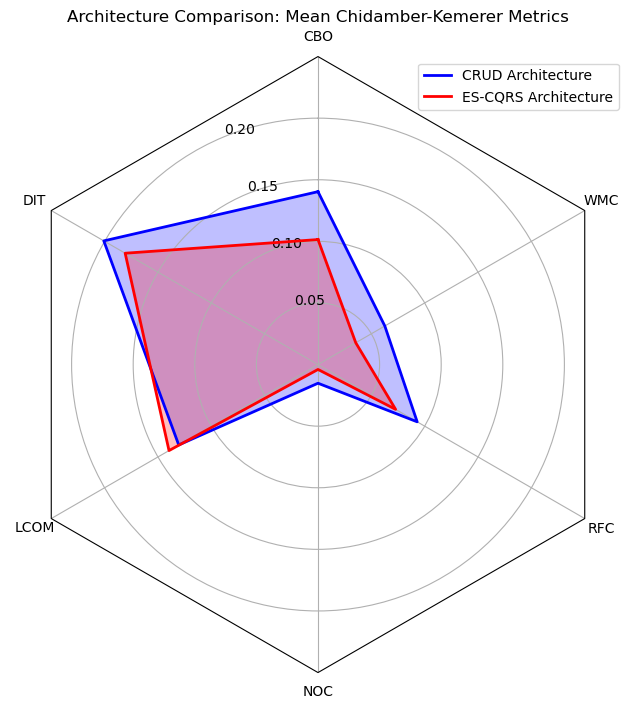

In [7]:
import matplotlib.pyplot as plt
from spider_plot import radar_factory

plt.style.use('default')

N = len(labels)
theta = radar_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))

ax.plot(theta, crud_mean, color='b', label='CRUD Architecture', linewidth=2)
ax.fill(theta, crud_mean, facecolor='b', alpha=0.25)

ax.plot(theta, cqrs_mean, color='r', label='ES-CQRS Architecture', linewidth=2)
ax.fill(theta, cqrs_mean, facecolor='r', alpha=0.25)

ax.set_varlabels(labels)
ax.set_ylim(0, .25)
ax.set_rgrids([0.05, 0.1, 0.15, 0.2])
ax.set_title("Architecture Comparison: Mean Chidamber-Kemerer Metrics", position=(0.5, 1.1), ha='center')
ax.legend()

plt.show()